In [2]:
import pandas as pd
import seaborn as sns
import sklearn.tree as tree
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

from plotly.offline import iplot
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from joblib import dump

In [3]:
path = r"/Users/coulson/Desktop/6893bigdata/6893BigData/Mode_train/match_data_till_Nov22_62k.csv"
df = pd.read_csv(path)

print('Total entrances:', df.shape[0], '.')
print('Total fields for each entrance:', df.shape[1], '.')

Total entrances: 62611 .
Total fields for each entrance: 61 .


In [4]:
pd.set_option('display.max_columns', None)
df.head(5)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,4827269461,1699731406894,1509,13,2,2,0,0,1,2,2,80,4,14,203,11,4,134,12,4,429,4,3,12,4,14,4,0,1,1,1,28,16,84,-1,-1,266,4,12,121,4,11,55,12,14,50,7,4,267,14,4,5,0,0,3,1,200.0,24.0,238.0,517.0,233.0
1,4831370335,1700108360998,2125,13,2,2,0,2,2,1,2,36,6,12,33,6,11,61,4,12,96,6,4,902,4,7,0,0,0,2,0,91,80,233,53,266,24,12,4,64,4,11,517,4,12,221,4,6,497,4,14,11,3,2,3,2,-1.0,53.0,516.0,68.0,-1.0
2,4820743231,1699143215353,1880,13,2,1,2,2,1,2,1,86,14,4,113,4,11,147,4,12,17,14,4,497,4,3,4,0,1,0,1,238,145,164,43,203,68,14,4,141,11,4,84,14,4,119,1,4,555,14,4,8,1,0,4,1,157.0,897.0,90.0,164.0,203.0
3,4826327830,1699652621639,2397,13,2,1,1,1,1,2,2,114,4,12,421,11,4,112,4,12,51,3,4,16,7,4,9,3,1,1,0,54,119,53,59,91,266,12,4,63,4,11,8,6,4,360,4,1,111,14,4,7,1,2,5,1,555.0,43.0,11.0,90.0,39.0
4,4829806625,1699943934236,912,13,2,2,0,0,0,2,2,86,14,4,32,4,11,75,12,4,22,7,4,412,4,14,0,0,0,0,0,119,517,360,-1,266,897,12,4,59,11,4,777,4,12,51,4,1,99,4,7,5,0,0,2,1,53.0,122.0,12.0,141.0,203.0


In [5]:
print('Total of missing values found:', df.isna().sum().sum(), '.')

Total of missing values found: 20 .


In [6]:
df.describe()


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,6.261100e+04,6.261100e+04,62611.000000,62611.0,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.00000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.00000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62611.000000,62607.000000,62607.000000,62607.000000,62607.000000,62607.000000
mean,4.827759e+09,1.699845e+12,1588.680919,13.0,1.509878,1.476386,1.097379,1.168245,1.020907,1.409609,1.411557,233.667199,7.917171,8.270400,158.500567,7.684800,7.691236,191.387887,7.776621,8.083228,184.350066,5.225136,5.331204,244.395538,7.368130,7.569085,5.018176,0.77159,0.458146,1.543754,0.896839,203.119164,202.731485,204.094408,204.109629,207.277300,227.566370,7.894475,8.260465,158.537334,7.683458,7.691987,193.326316,7.721950,8.110492,183.896120,5.212071,5.30156,244.704221,7.314450,7.626583,5.099950,0.787178,0.490537,1.743432,0.768651,203.408117,202.287300,203.887505,202.356350,209.734487
std,4.924355e+07,7.326624e+08,464.108215,0.0,0.499906,0.526169,0.786986,0.763294,0.820707,0.650128,0.559436,283.450614,4.138619,4.179609,182.710281,3.558143,3.567164,222.535308,4.356271,4.400638,187.735065,2.894146,2.997856,244.709904,4.623057,4.661570,3.610512,1.08269,0.654681,1.319608,0.764329,242.367598,243.341271,244.347557,246.702907,252.519389,279.710205,4.134181,4.188618,184.328615,3.561600,3.573110,224.512312,4.342012,4.401488,186.742361,2.918737,2.99476,245.333858,4.594802,4.676822,3.648781,1.086185,0.673489,1.365912,0.745276,243.056593,242.827185,246.347903,244.422128,255.632971
min,1.454148e+09,1.690726e+12,101.000000,13.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,4.825923e+09,1.699602e+12,1282.000000,13.0,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,58.000000,4.000000,4.000000,59.000000,4.000000,4.000000,61.000000,4.000000,4.000000,67.000000,4.000000,4.000000,53.000000,4.000000,4.000000,2.000000,0.00000,0.000000,0.000000,0.000000,53.000000,53.000000,53.000000,53.000000,53.000000,57.000000,4.000000,4.000000,59.000000,4.000000,4.000000,61.000000,4.000000,4.000000,63.000000,4.000000,4.00000,53.000000,4.000000,4.000000,2.000000,0.000000,0.000000,1.000000,0.000000,53.000000,53.000000,53.000000,53.000000,53.000000
50%,4.830780e+09,1.700041e+12,1624.000000,13.0,2.000000,1.000000,1.000000,1.000000

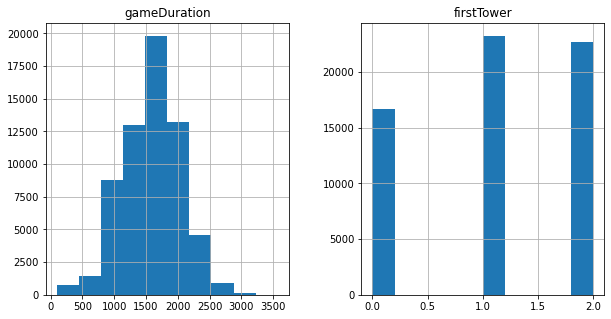

In [7]:
df[['gameDuration', 'firstTower']].hist(figsize=(10,5))
plt.show()

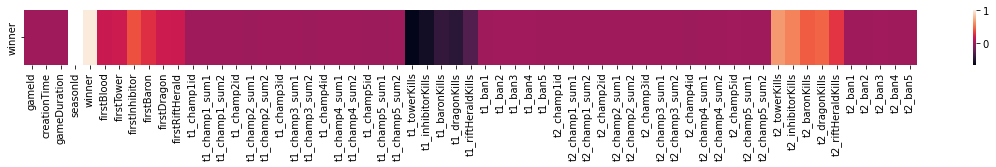

In [8]:
winner_correlation = df.corr()['winner'].to_frame().T 
plt.subplots(figsize=(20, 1))
sns.heatmap(winner_correlation)
plt.show()

In [9]:
abs_winner_correlation = winner_correlation.abs()

abs_winner_correlation.sort_values(by='winner', axis=1, ascending=False)

,winner,t2_towerKills,t1_towerKills,t2_inhibitorKills,t1_inhibitorKills,t1_dragonKills,t2_dragonKills,t2_baronKills,t1_baronKills,firstInhibitor,t2_riftHeraldKills,t1_riftHeraldKills,firstBaron,firstTower,firstDragon,firstRiftHerald,firstBlood,t1_ban2,t2_champ5id,t1_champ3_sum2,t1_ban3,t1_champ5_sum1,t1_champ5id,t2_ban3,t1_ban4,t1_champ4id,t2_champ4id,t2_champ2_sum2,t1_champ2_sum1,gameDuration,t2_champ4_sum2,t1_champ5_sum2,t2_champ2_sum1,t2_champ5_sum1,t1_ban1,t2_champ3_sum1,creationTime,t2_champ1_sum2,gameId,t2_champ3id,t2_champ1id,t2_ban1,t1_champ4_sum2,t2_ban5,t2_champ2id,t1_champ3_sum1,t2_ban2,t2_champ1_sum1,t1_champ4_sum1,t1_ban5,t1_champ1id,t2_ban4,t1_champ1_sum2,t1_champ2_sum2,t1_champ2id,t2_champ3_sum2,t1_champ1_sum1,t2_champ5_sum2,t1_champ3id,t2_champ4_sum1,seasonId
winner,1.0,0.653299,0.649977,0.570531,0.569159,0.463187,0.462405,0.433978,0.42706,0.400241,0.303671,0.296482,0.273541,0.179209,0.177933,0.17427,0.164121,0.011128,0.010369,0.008886,0.008606,0.008398,0.008167,0.008133,0.00769,0.007121,0.006349,0.005705,0.005617,0.005592,0.005334,0.004931,0.00477,0.004183,0.00404,0.003955,0.00379,0.003685,0.003599,0.003377,0.003177,0.002895,0.002796,0.002502,0.002452,0.002414,0.002403,0.002147,0.001559,0.001522,0.001437,0.001276,0.001049,0.001003,0.000968,0.000469,0.000426,0.000397,0.000388,0.000155,NaN


In [10]:
correlation_threshold = 0.3

# According to the correlation values, we filter the useful attributes.
attributes = list(filter(lambda x: abs(float(winner_correlation[x])) > correlation_threshold, df.columns))

In [11]:
dropped_df = df[attributes]

In [12]:
dropped_df.shape

(62611, 11)

In [13]:
attributes

['winner',
 'firstInhibitor',
 't1_towerKills',
 't1_inhibitorKills',
 't1_baronKills',
 't1_dragonKills',
 't2_towerKills',
 't2_inhibitorKills',
 't2_baronKills',
 't2_dragonKills',
 't2_riftHeraldKills']

In [14]:
X = dropped_df.drop(labels=['winner'], axis=1)
y = dropped_df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

In [15]:
X_test.shape

(6262, 10)

In [16]:
import multiprocessing

# Get the number of cores available
num_cores = multiprocessing.cpu_count()

print(f'Number of available cores: {num_cores}')


Number of available cores: 10


In [17]:
k = 10

In [18]:
# We define the parameters we want to try.
parameters = dict()
parameters['splitter'] = ['best', 'random']
parameters['max_depth'] = range(1, len(attributes))
parameters['criterion'] = ['gini', 'entropy']

In [20]:
decision_tree = DecisionTreeClassifier()

# We search for the best combination of the parameters.
grid_decision_tree = GridSearchCV(estimator=decision_tree, param_grid=parameters, cv=k, n_jobs=-1)
grid_decision_tree.fit(X_train, y_train)

print("Best parameters: ", grid_decision_tree.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'min_samples_split': 16, 'splitter': 'best'}


/Users/coulson/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


7200 fits failed out of a total of 28800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4608 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/coulson/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/coulson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/coulson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_

In [21]:
decision_tree = DecisionTreeClassifier(**grid_decision_tree.best_params_)

decision_tree = decision_tree.fit(X_train, y_train)

In [22]:
y_pred = decision_tree.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

print('Accuracy:', accuracy, '%')

Accuracy: 96.15 %


In [41]:
dump(decision_tree, 'trained_models/decision_tree_model.joblib')

['trained_models/decision_tree_model.joblib']

In [24]:
from sklearn.linear_model import LogisticRegression


In [32]:
logistic_model = LogisticRegression(max_iter=1000)  # max_iter may need to be increased if convergence is not reached

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy
accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

print('Accuracy:', accuracy, '%')

Accuracy: 94.97 %


In [40]:
dump(logistic_model, 'trained_models/logistic_model.joblib')

['trained_models/logistic_model.joblib']

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

import joblib

In [34]:
# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = round(accuracy_score(y_test, y_pred_rf)*100, 2)
print('Random Forest Accuracy:', accuracy_rf, '%')
joblib.dump(random_forest_model, 'trained_models/random_forest_model.joblib')

Random Forest Accuracy: 96.2 %


['trained_models/random_forest_model.joblib']

In [35]:
# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb = naive_bayes_model.predict(X_test)
accuracy_nb = round(accuracy_score(y_test, y_pred_nb)*100, 2)
print('Naive Bayes Accuracy:', accuracy_nb, '%')
joblib.dump(naive_bayes_model, 'trained_models/naive_bayes_model.joblib')

Naive Bayes Accuracy: 93.02 %


['trained_models/naive_bayes_model.joblib']

In [36]:
# Gradient Boosting Trees
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
accuracy_gb = round(accuracy_score(y_test, y_pred_gb)*100, 2)
print('Gradient Boosting Trees Accuracy:', accuracy_gb, '%')
joblib.dump(gradient_boosting_model, 'trained_models/gradient_boosting_model.joblib')

Gradient Boosting Trees Accuracy: 96.34 %


['trained_models/gradient_boosting_model.joblib']

In [37]:
# Multi-layer Perceptron
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = round(accuracy_score(y_test, y_pred_mlp)*100, 2)
print('Multi-layer Perceptron Accuracy:', accuracy_mlp, '%')
joblib.dump(mlp_model, 'trained_models/mlp_model.joblib')

Multi-layer Perceptron Accuracy: 96.36 %


['trained_models/mlp_model.joblib']

In [38]:
# Linear Support Vector Machine
linear_svc_model = LinearSVC()
linear_svc_model.fit(X_train, y_train)
y_pred_lsvc = linear_svc_model.predict(X_test)
accuracy_lsvc = round(accuracy_score(y_test, y_pred_lsvc)*100, 2)
print('Linear Support Vector Machine Accuracy:', accuracy_lsvc, '%')
joblib.dump(linear_svc_model, 'trained_models/linear_svc_model.joblib')

/Users/coulson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



Linear Support Vector Machine Accuracy: 94.89 %


/Users/coulson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



['trained_models/linear_svc_model.joblib']

In [39]:
# One-vs-Rest model using Logistic Regression as the base classifier
ovr_model = OneVsRestClassifier(LogisticRegression())
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)
accuracy_ovr = round(accuracy_score(y_test, y_pred_ovr)*100, 2)
print('One-vs-Rest Accuracy:', accuracy_ovr, '%')
joblib.dump(ovr_model, 'trained_models/ovr_model.joblib')

One-vs-Rest Accuracy: 94.97 %


['trained_models/ovr_model.joblib']

In [42]:
from sklearn.neighbors import KNeighborsClassifier
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default number of neighbors is 5
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = round(accuracy_score(y_test, y_pred_knn)*100, 2)
print('K-Nearest Neighbors Accuracy:', accuracy_knn, '%')
joblib.dump(knn_model, 'trained_models/knn_model.joblib')

K-Nearest Neighbors Accuracy: 95.86 %


['trained_models/knn_model.joblib']